In [ ]:
import pandas as pd
import numpy as np

# Load CSV with python engine and skip problematic lines
df = pd.read_csv("/content/MiningProcess_Flotation_Plant_Database.csv",
                 sep=",",
                 encoding='utf-8',
                 engine='python',
                 on_bad_lines='skip',  # skips broken rows
                 decimal=',')

# Parse the first column as datetime
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], errors='coerce')
df = df.dropna(subset=[df.columns[0]])  # drop rows with bad timestamps
df = df.set_index(df.columns[0])

# Convert all remaining columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Resample to 1-minute intervals, interpolate missing values
df_resampled = df.resample('1min').mean().interpolate()

# Save cleaned and resampled data (optional)
df_resampled.to_csv("/content/cleaned_resampled_mining_data.csv")

# Display basic info
print("✅ Successfully loaded and cleaned data.")
print("Shape:", df_resampled.shape)
print(df_resampled.head())


/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


✅ Successfully loaded and cleaned data.
Shape: (245461, 23)
                     % Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date                                                                       
2017-03-10 01:00:00         55.2          16.98  3162.625026  578.786678   
2017-03-10 01:01:00         55.2          16.98  3162.135549  578.093895   
2017-03-10 01:02:00         55.2          16.98  3161.646071  577.401111   
2017-03-10 01:03:00         55.2          16.98  3161.156594  576.708327   
2017-03-10 01:04:00         55.2          16.98  3160.667117  576.015544   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date                                                                
2017-03-10 01:00:00     398.753368    10.113487          1.729558   
2017-03-10 01:01:00     398.772009    10.113758          1.728529   
2017-03-10 01:02:00     398.790650    10.114029          1.727499   
2017-03-10 01:03:00     398.809291    10.114300          1.726

<ipython-input-7-ffe51d2e7ac3>:21: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df.resample('1T').mean().interpolate()



Correlation with % Silica Concentrate:
% Silica Concentrate            1.000000
Amina Flow                      0.125240
Ore Pulp Flow                   0.065845
% Silica Feed                   0.050008
Flotation Column 05 Air Flow    0.046272
Ore Pulp Density                0.042716
Flotation Column 02 Level       0.040337
Flotation Column 01 Level       0.032675
Flotation Column 03 Level       0.022291
Flotation Column 04 Air Flow   -0.020298
Starch Flow                    -0.057440
Flotation Column 07 Air Flow   -0.111784
Flotation Column 06 Air Flow   -0.111917
Flotation Column 06 Level      -0.112226
Ore Pulp pH                    -0.141291
Flotation Column 07 Level      -0.144024
Flotation Column 04 Level      -0.159294
Flotation Column 05 Level      -0.175510
Flotation Column 02 Air Flow   -0.189086
Flotation Column 01 Air Flow   -0.233219
Flotation Column 03 Air Flow   -0.234726
% Iron Concentrate             -0.805877
Name: % Silica Concentrate, dtype: float64


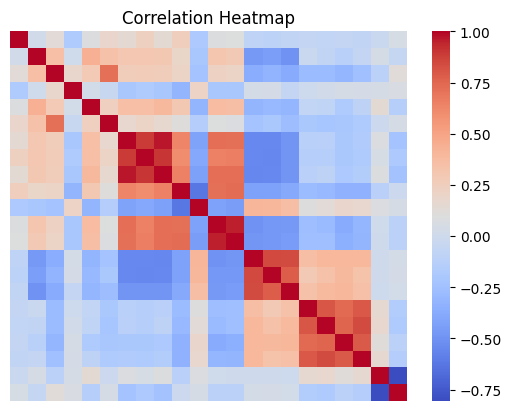


--- Predicting % Silica (Current Time) ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:17:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:17:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:17:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)



--- Predicting % Silica (Future: 2 Hours Ahead) ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:17:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:17:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:17:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)



--- Predicting % Silica (Without % Iron Concentrate) ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:17:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:17:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:17:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [ ]:
# Install XGBoost (if not already installed)
!pip install xgboost --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Load dataset
df = pd.read_csv("/content/cleaned_resampled_mining_data.csv", on_bad_lines='skip')

# Step 1: Parse datetime and set as index
df['date'] = pd.to_datetime(df.iloc[:, 0])
df.set_index('date', inplace=True)
df.drop(columns=df.columns[0], inplace=True)  # Remove redundant datetime column

# Step 2: Resample to 1-minute intervals (mean + interpolate missing)
df_resampled = df.resample('1T').mean().interpolate()

# Step 3: Correlation check
print("\nCorrelation with % Silica Concentrate:")
print(df_resampled.corr()['% Silica Concentrate'].sort_values(ascending=False))

# Optional: Plot heatmap
sns.heatmap(df_resampled.corr(), cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title("Correlation Heatmap")
plt.show()

# Step 4: Predict % Silica every minute
print("\n--- Predicting % Silica (Current Time) ---")
X = df_resampled.drop(columns=['% Silica Concentrate'])
y = df_resampled['% Silica Concentrate']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

model = xgb.XGBRegressor(tree_method='gpu_hist', predictor='gpu_predictor', random_state=42)
model.fit(X_train, y_train)
pred_current = model.predict(X_test)
rmse_current = mean_squared_error(y_test, pred_current)


# Step 5: Predict silica n steps (e.g., 2 hours = 120 minutes) ahead
print("\n--- Predicting % Silica (Future: 2 Hours Ahead) ---")
n_minutes_ahead = 120
df_shifted = df_resampled.copy()
df_shifted['target_future'] = df_shifted['% Silica Concentrate'].shift(-n_minutes_ahead)
df_shifted.dropna(inplace=True)

X_future = df_shifted.drop(columns=['% Silica Concentrate', 'target_future'])
y_future = df_shifted['target_future']

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_future, y_future, shuffle=False, test_size=0.2)

model_future = xgb.XGBRegressor(tree_method='gpu_hist', predictor='gpu_predictor', random_state=42)
model_future.fit(X_train_f, y_train_f)
pred_future = model_future.predict(X_test_f)
rmse_future = mean_squared_error(y_test_f, pred_future)


# Step 6: Predict % Silica without using % Iron Concentrate
print("\n--- Predicting % Silica (Without % Iron Concentrate) ---")
X_wo_iron = df_resampled.drop(columns=['% Silica Concentrate', '% Iron Concentrate'])
y_wo_iron = df_resampled['% Silica Concentrate']

X_train_wo, X_test_wo, y_train_wo, y_test_wo = train_test_split(X_wo_iron, y_wo_iron, shuffle=False, test_size=0.2)

model_wo = xgb.XGBRegressor(tree_method='gpu_hist', predictor='gpu_predictor', random_state=42)
model_wo.fit(X_train_wo, y_train_wo)
pred_wo = model_wo.predict(X_test_wo)
rmse_wo = mean_squared_error(y_test_wo, pred_wo)



In [ ]:
from tabulate import tabulate

results = [
    ["Current Minute", f"{rmse_current:.4f}"],
    ["2 Hours Ahead", f"{rmse_future:.4f}"],
    ["Without % Iron Concentrate", f"{rmse_wo:.4f}"]
]

print(tabulate(results, headers=["Scenario", "Result"], tablefmt="grid"))


+----------------------------+----------+
| Scenario                   |   Result |
+============================+==========+
| Current Minute             |   0.6516 |
+----------------------------+----------+
| 2 Hours Ahead              |   1.9252 |
+----------------------------+----------+
| Without % Iron Concentrate |   1.2831 |
+----------------------------+----------+
